<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [49]:
a=-1
b=2
x=np.random.uniform(0,20,500) #Here we generate 500 samples ,we can generate any number of samples.
y=a*x+b

In [50]:
#showing the data
print(x)
print(y)

[2.32362553e+00 8.86936686e+00 4.53830039e+00 1.20055950e+01
 1.20635914e+01 1.97982214e+01 1.71717345e+01 7.80378553e+00
 1.29518292e+00 1.38173882e+01 9.43750240e+00 1.48145370e+01
 1.59311312e+01 1.42220097e+01 1.73197574e+01 5.84690942e+00
 1.24748841e+01 1.19796330e+01 2.21389431e+00 1.28549078e+01
 4.13192299e+00 6.69579399e+00 1.55712087e+01 1.28081821e+01
 7.00926026e+00 1.93062996e+01 1.59281471e+01 1.39192484e+00
 6.05845069e+00 1.51964472e+01 1.55044047e+01 1.87092837e+00
 3.37617894e+00 4.33338414e+00 8.17801519e+00 1.82825413e+01
 1.53073076e+01 1.45091214e+01 1.95291219e+01 3.71939269e+00
 6.27215286e+00 3.03681081e+00 1.17560746e+01 7.52283413e+00
 8.37042418e+00 3.21626307e+00 1.27891536e+01 8.05989734e+00
 7.04675558e+00 5.74913456e+00 3.20977924e+00 1.09483385e+01
 1.65201305e+01 1.02695426e+01 7.54112707e+00 1.51105110e+01
 6.42161364e+00 2.55265757e+00 1.43143360e+01 1.48764754e+01
 5.62599257e+00 1.88653921e+01 1.41050885e+00 1.57066240e+01
 1.96726155e+01 3.915861

In [51]:
#Describing the data
print(stats.describe(x))
print(stats.describe(y))

DescribeResult(nobs=500, minmax=(0.018354137917726554, 19.954145001858386), mean=9.390011707241312, variance=36.238278679592646, skewness=0.13748344032552445, kurtosis=-1.3055154712354078)
DescribeResult(nobs=500, minmax=(-17.954145001858386, 1.9816458620822734), mean=-7.390011707241312, variance=36.238278679592646, skewness=-0.13748344032552445, kurtosis=-1.3055154712354078)


#### Plot your data points. 

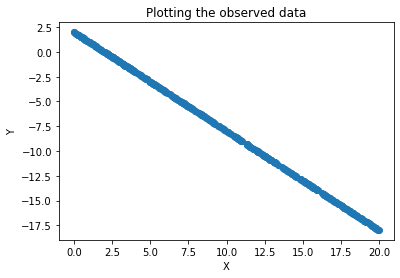

In [52]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plotting the observed data")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

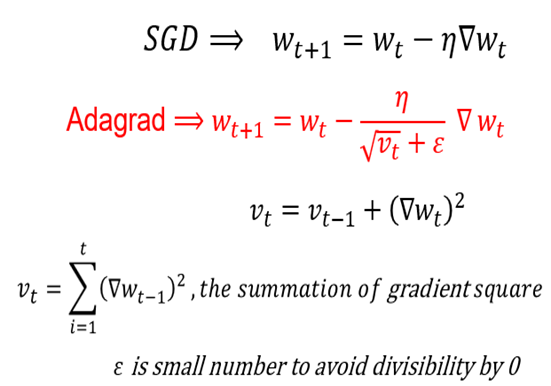

In [53]:
def adagradGD(x,y,alph,epsi,max_iter):
    theta_0 = 0.0
    theta_1 = 0.0
    alpha = alph
    epsilon=epsi
    vt_0=0.0
    vt_1=0.0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        vt_0=vt_0+theta0_grd**2
        vt_1=vt_1+theta1_grd**2
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * theta0_grd
        theta0_list.append(theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * theta1_grd
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

In [64]:
# Here we use 0.1 learning rate and 200 epochs for training the data
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adagradGD(x,y,0.1,1e-8,200)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")
print(f"Predicted Values \n {y_predict}")

Theta_0 = -0.14088874158772244, Theta_1 = -0.8329138340517717
Predicted Values 
 [ -2.07874582  -7.52920755  -3.92284567 -10.1406599  -10.18895192
 -16.62936909 -14.44236449  -6.64192681  -1.22238949 -11.64929106
  -8.00227864 -12.47958989 -13.40934767 -11.98620848 -14.56561915
  -5.01248901 -10.53142424 -10.11904201  -1.98737561 -10.84785968
  -3.5844662   -5.71933222 -13.10964996 -10.80895242  -5.9803471
 -16.2197591  -13.40686293  -1.30294387  -5.1886337  -12.79759618
 -13.05402408  -1.70179715  -2.95517857  -3.75221745  -6.95353772
 -15.36730321 -12.88990666 -12.22527855 -16.40529716  -3.24096338
  -5.36657772  -2.67259592  -9.93289098  -6.40798617  -7.11375148
  -2.82202096 -10.79310795  -6.85518418  -6.01156844  -4.93107452
  -2.81662205  -9.26031098 -13.89979142  -8.69509597  -6.42321821
 -12.72603945  -5.49102966  -2.26945461 -12.06308609 -12.53116434
  -4.82853752 -15.8526273   -1.31841827 -13.22240663 -16.52478045
  -3.40455792  -3.49632486  -8.20709079  -7.73535219  -7.04947

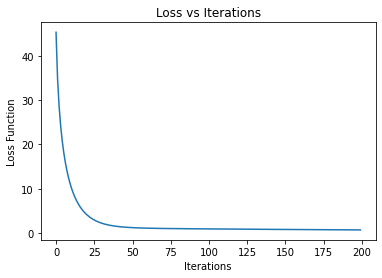

In [65]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

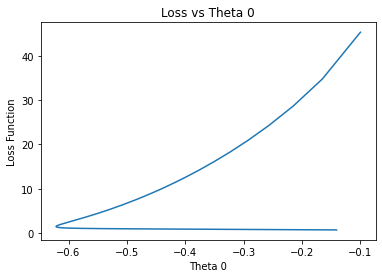

In [66]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

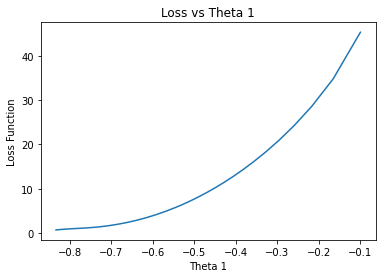

In [67]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

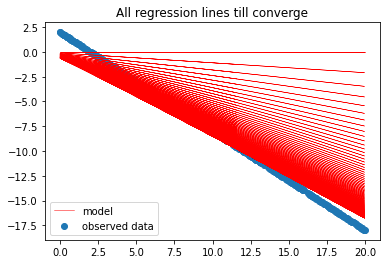

In [68]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

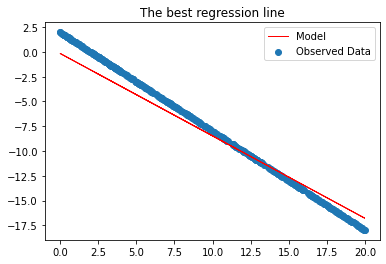

In [69]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [70]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9630370893655992


## using different hyperparameters

### we can see the variance in the dataset is very small so we can increase the learning rate and decrease the training epochs and get better accuracy.
### so we use 0.5 learning rate and 150 epochs for training our dataset and we can also increase the learning rate more than that because the variance in the dataset is to small

In [100]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adagradGD(x,y,0.5,1e-8,150)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")
print(f"Predicted Values \n {y_predict}")

Theta_0 = 1.7429145636121193, Theta_1 = -0.980014042393872
Predicted Values 
 [-5.37606743e-01 -6.95045338e+00 -2.70731825e+00 -1.00230084e+01
 -1.00798273e+01 -1.76574252e+01 -1.50842625e+01 -5.90650599e+00
  4.69955939e-01 -1.17980177e+01 -7.50705437e+00 -1.27749219e+01
 -1.38688465e+01 -1.21944244e+01 -1.52292802e+01 -3.98935929e+00
 -1.04827698e+01 -9.99757343e+00 -4.30103337e-01 -1.08550780e+01
 -2.30919131e+00 -4.82100940e+00 -1.35162313e+01 -1.08093009e+01
 -5.12811153e+00 -1.71754907e+01 -1.38659230e+01  3.75178121e-01
 -4.19660574e+00 -1.31490784e+01 -1.34507836e+01 -9.41004571e-02
 -1.56879072e+00 -2.50656230e+00 -6.27313786e+00 -1.61725171e+01
 -1.32576881e+01 -1.24757070e+01 -1.73937891e+01 -1.90503639e+00
 -4.40596923e+00 -1.23631260e+00 -9.77855382e+00 -5.63125859e+00
 -6.46164047e+00 -1.41212154e+00 -1.07906588e+01 -6.15741809e+00
 -5.16484560e+00 -3.89356949e+00 -1.40576935e+00 -8.98721675e+00
 -1.44458876e+01 -8.32220206e+00 -5.64918014e+00 -1.30648869e+01
 -4.55239559

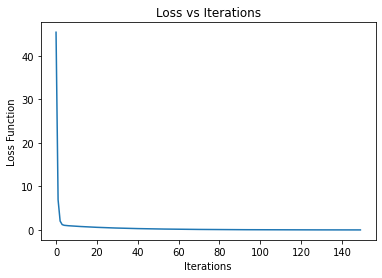

In [101]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

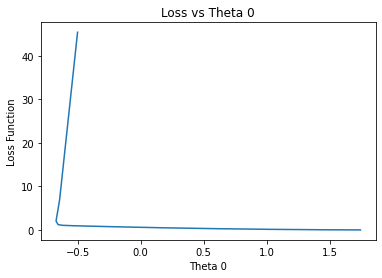

In [102]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

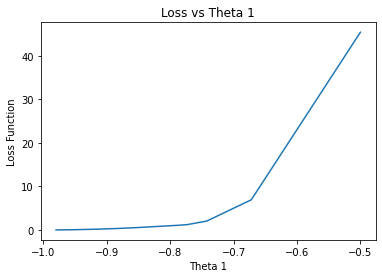

In [103]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

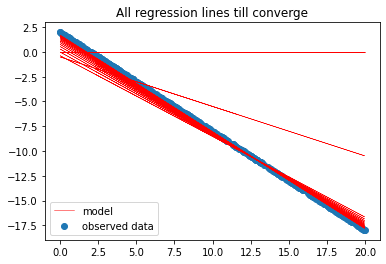

In [104]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),10):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

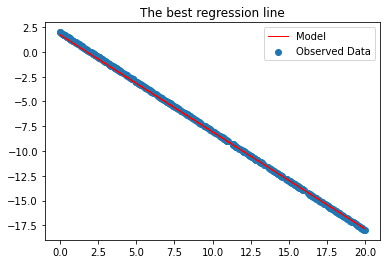

In [105]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [106]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9994673215867229


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

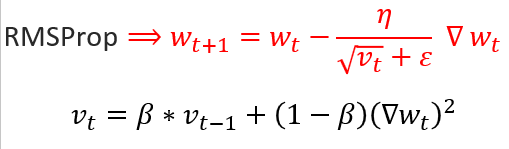

In [107]:
def rmspropGD(x,y,alph,epsi,b,max_iter):
    theta_0 = 0.0
    theta_1 = 0.0
    alpha = alph
    epsilon=epsi
    beta=b
    vt_0=0.0
    vt_1=0.0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        vt_0=beta*vt_0+(1-beta)*theta0_grd**2
        vt_1=beta*vt_1+(1-beta)*theta1_grd**2
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * theta0_grd
        theta0_list.append(theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * theta1_grd
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

### as we said before because the nature of our dataset we don't need many epochs to train our data so we choose 0.1 learning rate and just 30 epochs and that was enough to get good results
### as we notice here in rmsprop we need very smaller epochs to train our model and get good accuracy comparing to adagrad because in adagrad the summation of the gradient square overtime killed the learning rate and made the model require more epochs to reach the minima

In [153]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=rmspropGD(x,y,0.1,1e-8,0.9,30)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = 0.4214133849712279, Theta_1 = -0.8776146273997237
Predicted Values 
 [ -1.66293704  -7.37925225  -3.5969853  -10.11808165 -10.16872918
 -16.92328622 -14.62960758  -6.44869322  -0.76481079 -11.7002983
  -7.87539801 -12.57109605 -13.546204   -12.0536493  -14.75887415
  -4.73977743 -10.52790604 -10.09540932  -1.56711012 -10.85977604
  -3.24210092  -5.48109786 -13.23188813 -10.81897102  -5.75484409
 -16.49369696 -13.54359806  -0.84929432  -4.92451381 -12.90461352
 -13.17354903  -1.26760219  -2.58211895  -3.41803446  -6.77550337
 -15.59966141 -13.00142656 -12.30438034 -16.68828489  -2.8818433
  -5.11113728  -2.28575295  -9.90017853  -6.20334182  -6.94353176
  -2.4424664  -10.80235371  -6.6723525   -5.78758829  -4.65439185
  -2.43680415  -9.19479254 -14.06056979  -8.60200843  -6.21931682
 -12.82956651  -5.24165954  -1.8629479  -12.13427672 -12.62518612
  -4.54685347 -16.10865783  -0.8655235  -13.35014466 -16.81359614
  -3.05341737  -3.14966037  -8.09020015  -7.59545187  -6.87611488

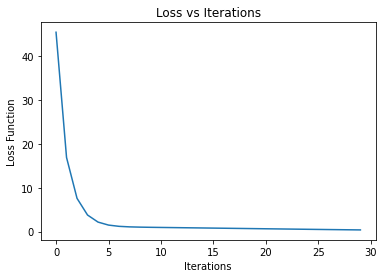

In [154]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

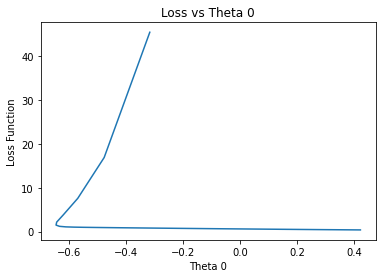

In [155]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

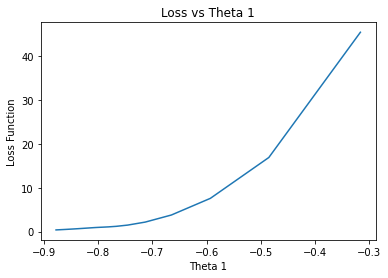

In [156]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

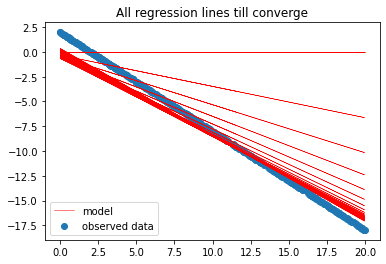

In [157]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

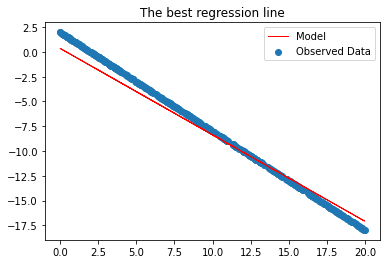

In [158]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [159]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9799238334047657


## using different hyperparameters

### Here we decrease the learning rate to 0.05 and therefore increase the number of epochs for training

In [207]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=rmspropGD(x,y,0.05,1e-8,0.9,80)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = 1.4228086924193524, Theta_1 = -0.9560142690636916
Predicted Values 
 [-8.24019307e-01 -7.06637684e+00 -2.93604782e+00 -1.00572462e+01
 -1.01125546e+01 -1.74886979e+01 -1.49839441e+01 -6.05018336e+00
  1.56756758e-01 -1.17850659e+01 -7.60818027e+00 -1.27359986e+01
 -1.38008406e+01 -1.21709340e+01 -1.51251064e+01 -4.18400508e+00
 -1.05047846e+01 -1.00324875e+01 -7.19373940e-01 -1.08671949e+01
 -2.54850531e+00 -4.99354531e+00 -1.34575999e+01 -1.08226348e+01
 -5.29248296e+00 -1.70195758e+01 -1.37979948e+01  6.44986611e-02
 -4.38574177e+00 -1.31002079e+01 -1.33938922e+01 -3.92303884e-01
 -1.82778868e+00 -2.74062908e+00 -6.40706813e+00 -1.60432669e+01
 -1.32059302e+01 -1.24447385e+01 -1.72320706e+01 -2.15509507e+00
 -4.58953922e+00 -1.50414968e+00 -9.81929065e+00 -5.78225357e+00
 -6.59055929e+00 -1.67528464e+00 -1.08044883e+01 -6.29442483e+00
 -5.32824044e+00 -4.09076191e+00 -1.66910133e+00 -9.04899171e+00
 -1.43625408e+01 -8.40165681e+00 -5.79969867e+00 -1.30182547e+01
 -4.7320727

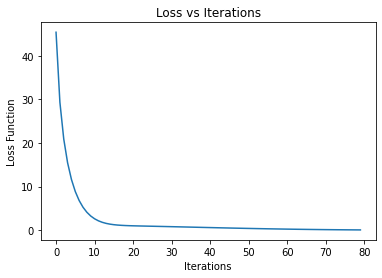

In [208]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

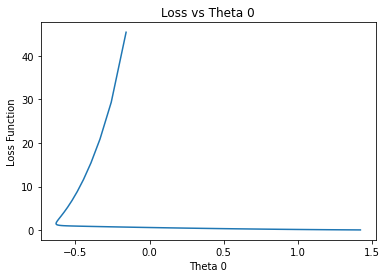

In [209]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

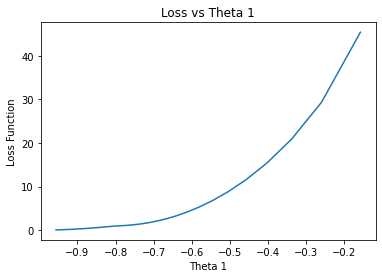

In [210]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

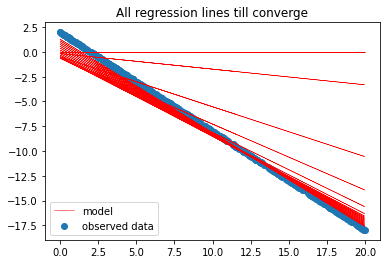

In [211]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),5):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

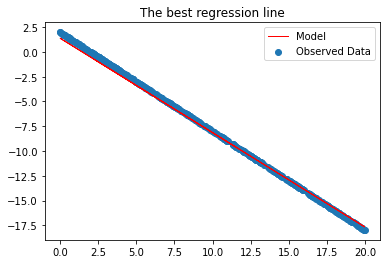

In [212]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [213]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9973200743048362


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

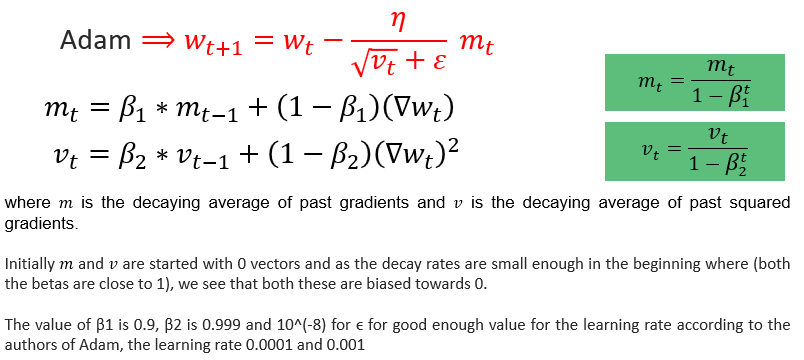

In [214]:
def adamGD(x,y,alph,epsi,b1,b2,max_iter):
    theta_0 = 0.0
    theta_1 = 0.0
    alpha = alph
    epsilon=epsi
    beta_1=b1
    beta_2=b2
    mt_0=0.0
    mt_1=0.0
    vt_0=0.0
    vt_1=0.0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        mt_0=beta_1*mt_0+(1-beta_1)*theta0_grd
        mt_1=beta_1*mt_1+(1-beta_1)*theta1_grd
        vt_0=beta_2*vt_0+(1-beta_2)*theta0_grd**2
        vt_1=beta_2*vt_1+(1-beta_2)*theta1_grd**2
        mt_0=mt_0/(1-pow(beta_1,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        mt_1=mt_1/(1-pow(beta_1,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        vt_0=vt_0/(1-pow(beta_2,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        vt_1=vt_1/(1-pow(beta_2,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * mt_0
        theta0_list.append(theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * mt_1
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

### Here as we can see in adam we can get good result by using just 25 epochs for training our model because the momentum term speed up the loss function to reach around the minima
### But if we want higher accuracy we increase the iterations way more because the momentum term makes loss function oscillates around minima ,so it needs higher iterations to exactly reach the minima


In [598]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adamGD(x,y,0.023,1e-8,0.9,0.95,25)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = -0.7703448516196506, Theta_1 = -0.7706954328699196
Predicted Values 
 [ -2.54719575  -7.56447681  -4.24473399  -9.96838148 -10.01283544
 -15.94139429 -13.92820397  -6.74771355  -1.75889916 -11.35711274
  -7.99995012 -12.12142277 -12.97728716 -11.66725331 -14.04166285
  -5.24777688 -10.32808945  -9.94848169  -2.46308727 -10.61937588
  -3.93324756  -5.89844306 -12.70140821 -10.58356081  -6.13871353
 -15.56433844 -12.9749999   -1.8330514   -5.40992231 -12.4141552
 -12.65020325  -2.20020543  -3.35397317  -4.08766662  -7.03455889
 -14.7796323  -12.49912922 -11.88732307 -15.73513069  -3.61704495
  -5.57372405  -3.09384904  -9.77712519  -6.53236557  -7.18203951
  -3.23139838 -10.56897559  -6.94402209  -6.16745352  -5.17283289
  -3.22642856  -9.15799913 -13.42875242  -8.63770513  -6.54638703
 -12.34828551  -5.68828506  -2.72274778 -11.73802101 -12.16889829
  -5.07844512 -15.2263848   -1.84729596 -12.80520344 -15.84511794
  -3.76763766  -3.85211134  -8.18848463  -7.7542379   -7.122866

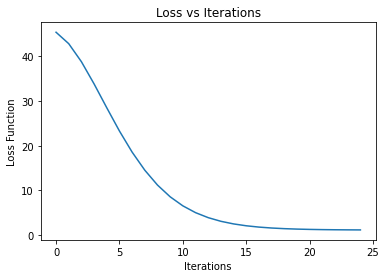

In [599]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

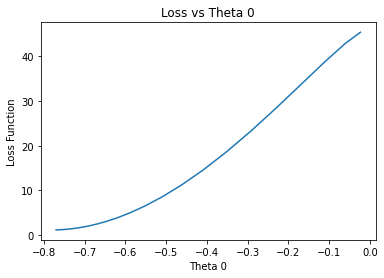

In [600]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

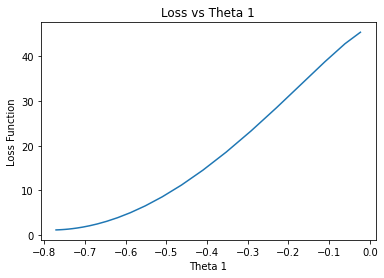

In [601]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

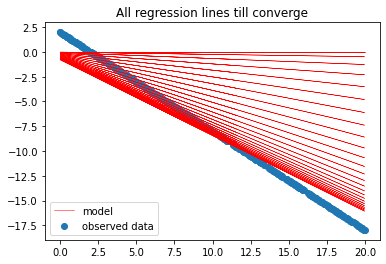

In [602]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

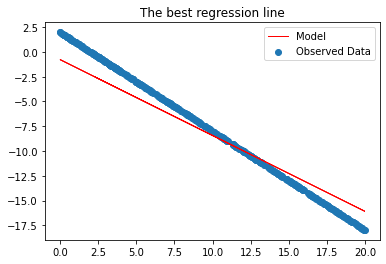

In [603]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [604]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9368873215536557


### Here we increasing the epochs a way more to get excellent results ,because as we said before the momentum term makes loss function oscillates around minima
### Here we use 1000 epochs to reach minima and get excellent result

In [631]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adamGD(x,y,0.023,1e-8,0.9,0.95,1000)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = 1.9991277318853558, Theta_1 = -1.0008721434501175
Predicted Values 
 [ -0.32064906  -6.86052749  -2.53334028  -9.99394659 -10.05189103
 -17.77959328 -15.15545886  -5.79590058   0.70687239 -11.80411698
  -7.42815415 -12.80037265 -13.91596673 -12.20837611 -15.30334917
  -3.84077721 -10.46281537  -9.9680078   -0.21101612 -10.84249866
  -2.12732686  -4.68890145 -13.55636663 -10.79581477  -5.00208695
 -17.28811207 -13.91298535   0.61021712  -4.052129   -13.18194078
 -13.48962247   0.13164263  -1.37225971  -2.32860756  -6.16979505
 -16.26527067 -13.29270191 -12.49523057 -17.51073474  -1.71516605
  -4.26563977  -1.03319555  -9.74464964  -5.51520082  -6.3620317
  -1.21248708 -10.77680337  -6.05178299  -5.03954868  -3.74308992
  -1.20600906  -8.93763701 -14.50443844  -8.25944907  -5.53347738
 -13.09608157  -4.41496668  -0.54947596 -12.30061972 -12.8622556
  -3.62005823 -16.84759942   0.59164976 -13.69166066 -17.65409988
  -1.91145922  -2.02156818  -7.67390334  -7.1078755   -6.28490191

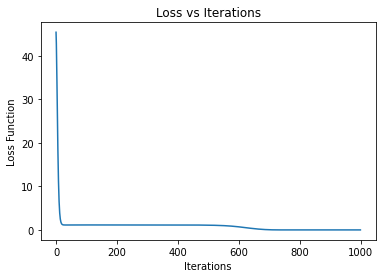

In [632]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

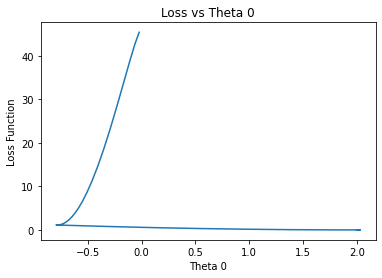

In [633]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

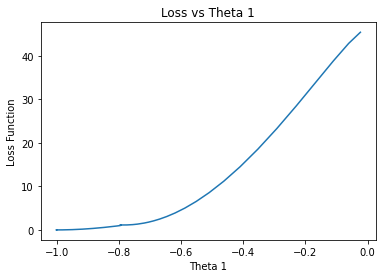

In [634]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

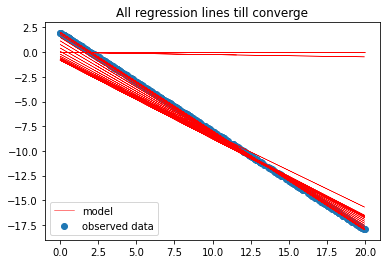

In [635]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),20):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

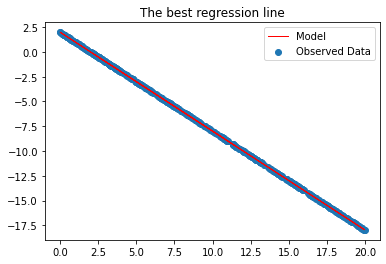

In [636]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [637]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9999969688644305
